__Выполнил:__ Брюзгин Александр Сергеевич

Параметры ai, bi и ci, соответственно равны:

    a1 = 2    b1 = 1     c1 = 19   
    a2 = 18   b2 = 13    c2 = 6
    a3 = 32   b3 = 6     c3 = 18 
            

In [200]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import warnings
import pandas as pd
from statsmodels.stats.weightstats import ztest
warnings.filterwarnings('ignore')

# Задание 1. Базовые описательные статистики
    

## 1.1 Основные характеристики выборки 

Создадим выборку объемом n = 100 из равномерного [-2, 18] распределения

In [148]:
np.random.seed(100)
uniform_sample = np.random.uniform(-2, 18, 100)

   Создадим выборку объемом n=100 из нормального распределения с параметрами  $ \mu $ = 1, $ \sigma^2 $ = 13 

In [149]:
np.random.seed(100)
normal_sample = np.random.normal(1, np.sqrt(13), 100)

Создадим выборку объемом n=100 из показательного распределения с параметром $ \lambda = $$\frac{1}{19}$$ $

In [150]:
np.random.seed(100)
exp_sample = np.random.exponential(scale = 1/(1/19), size = 100)

Найдем для построенных выборок:

1. Первый и последний члены вариационного ряда
2. Выборочное среднее
3. Выборочную стандартную ошибку
4. Выборочеую медиану

In [151]:
list_sample = [uniform_sample, normal_sample, exp_sample]
text_list = ['равномерного', 'нормального', 'показательного']

for i in range(0,3):
    print(f'Для {text_list[i]} распределения:\n')
    print(f'Первый и последний член вариацинного ряда: {round(np.min(list_sample[i]), 2)} и {round(np.max(list_sample[i]), 2)}')
    print(f'Выборочное среднее: {round(np.mean(list_sample[i]), 2)}')
    print(f'Выборочная стандартная ошибка: {round(np.std(list_sample[i]) / np.sqrt(100), 2)}')
    print(f'Выборочная медиана: {round(np.median(list_sample[i]), 2)}')
    print('\n\n')

Для равномерного распределения:

Первый и последний член вариацинного ряда: -1.91 и 17.84
Выборочное среднее: 7.45
Выборочная стандартная ошибка: 0.58
Выборочная медиана: 6.56



Для нормального распределения:

Первый и последний член вариацинного ряда: -7.97 и 8.34
Выборочное среднее: 0.62
Выборочная стандартная ошибка: 0.35
Выборочная медиана: 0.87



Для показательного распределения:

Первый и последний член вариацинного ряда: 0.09 и 92.12
Выборочное среднее: 17.91
Выборочная стандартная ошибка: 1.89
Выборочная медиана: 10.62





Теперь построим для выборок диаграммы рассеивания

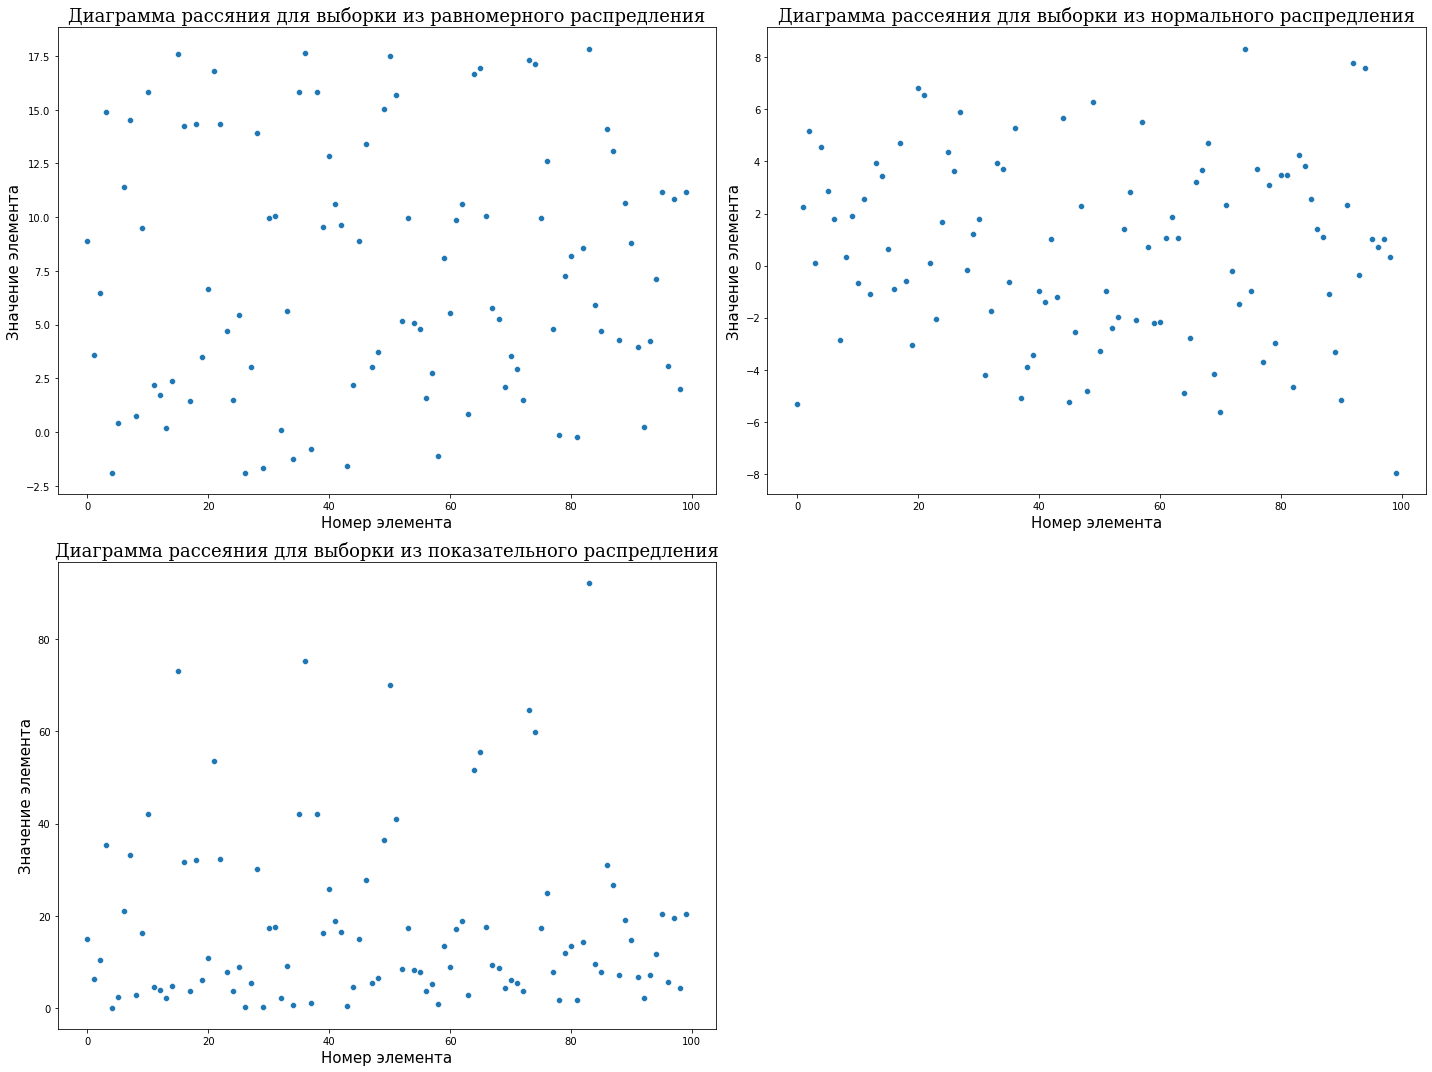

In [152]:
fig, ax = plt.subplots(2,2, figsize = (20,15))

sns.scatterplot(x = range(len(uniform_sample)), y = uniform_sample, ax = ax[0,0])
ax[0,0].set_title('Диаграмма рассяния для выборки из равномерного распредления', fontsize = 18, fontfamily = 'serif')
ax[0,0].set_xlabel('Номер элемента', fontsize = 15)
ax[0,0].set_ylabel('Значение элемента', fontsize = 15)

sns.scatterplot(x = range(len(normal_sample)), y = normal_sample, ax = ax[0,1])
ax[0,1].set_title('Диаграмма рассеяния для выборки из нормального распредления', fontsize = 18, fontfamily = 'serif')
ax[0,1].set_xlabel('Номер элемента', fontsize = 15)
ax[0,1].set_ylabel('Значение элемента', fontsize = 15)

sns.scatterplot(x = range(len(exp_sample)), y = exp_sample, ax = ax[1,0])
ax[1,0].set_title('Диаграмма рассеяния для выборки из показательного распредления', fontsize = 18, fontfamily = 'serif')
ax[1,0].set_xlabel('Номер элемента', fontsize = 15)
ax[1,0].set_ylabel('Значение элемента', fontsize = 15)

ax[1,1].remove()

plt.tight_layout()
plt.show()

Теперь разделим построенные выборки на 10 равных отрезков, посчитаем количество значений в каждом из них и построим гистограммы

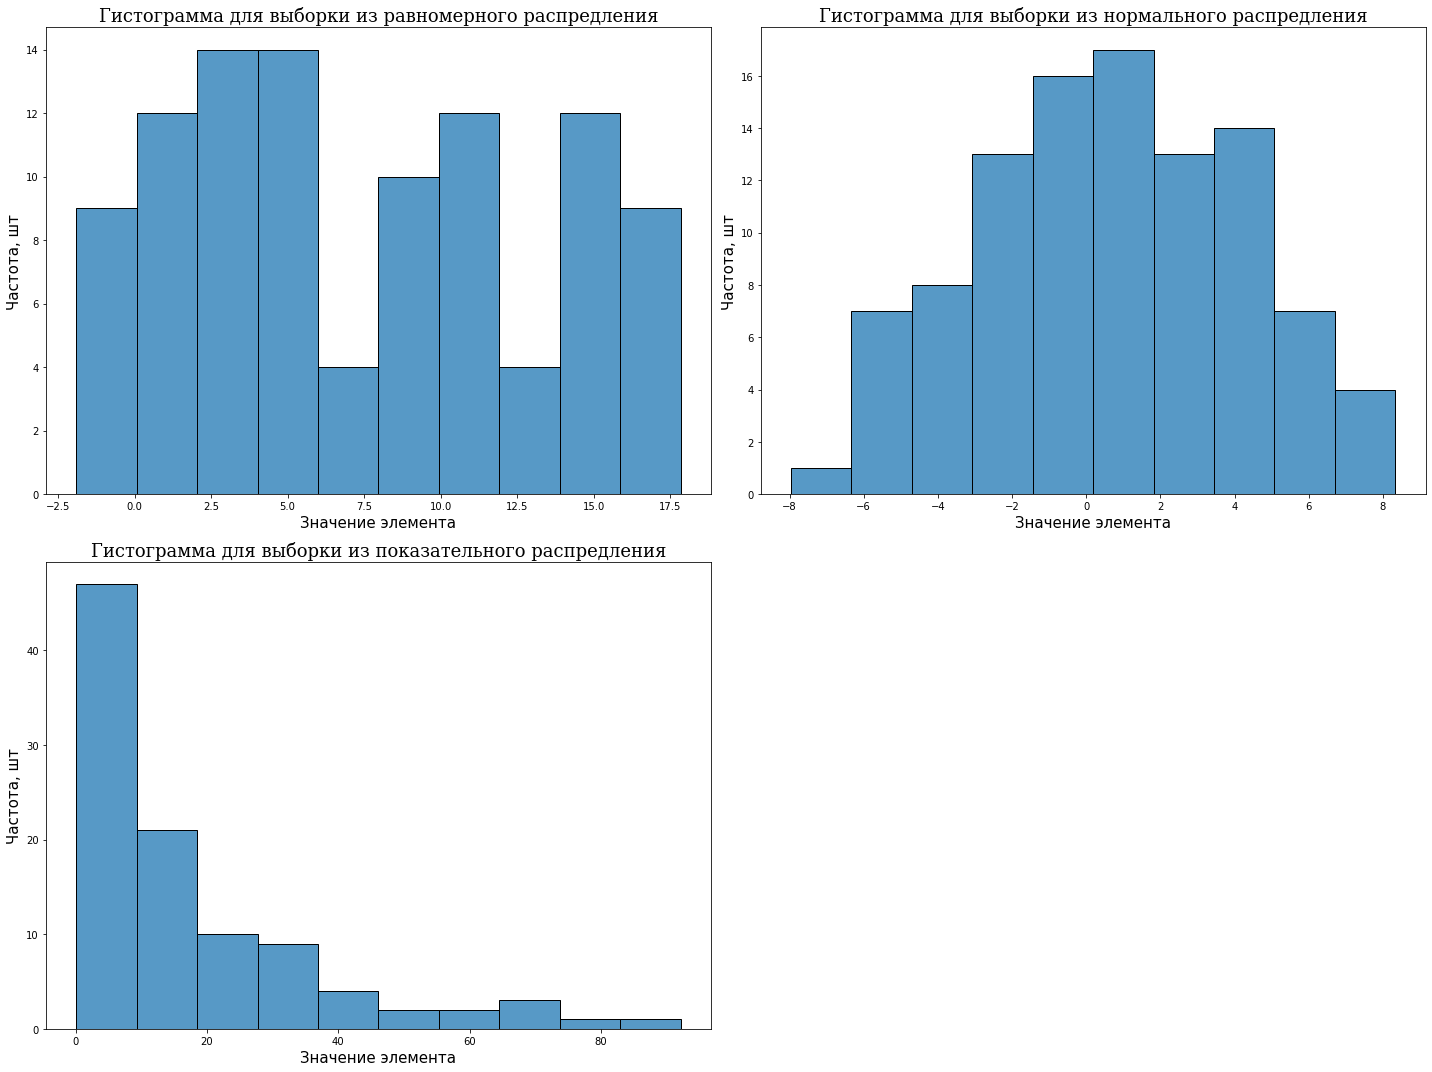

In [153]:
fig, ax = plt.subplots(2,2, figsize = (20,15))

bins_uni = np.linspace(min(uniform_sample), max(uniform_sample), 11)
sns.histplot(uniform_sample, bins = bins_uni, ax = ax[0,0])
ax[0,0].set_title('Гистограмма для выборки из равномерного распредления', fontsize = 18, fontfamily = 'serif')
ax[0,0].set_xlabel('Значение элемента', fontsize = 15)
ax[0,0].set_ylabel('Частота, шт', fontsize = 15)

bins_norm = np.linspace(min(normal_sample), max(normal_sample), 11)
sns.histplot(normal_sample, bins = bins_norm, ax = ax[0,1])
ax[0,1].set_title('Гистограмма для выборки из нормального распредления', fontsize = 18, fontfamily = 'serif')
ax[0,1].set_xlabel('Значение элемента', fontsize = 15)
ax[0,1].set_ylabel('Частота, шт', fontsize = 15)

bins_exp = np.linspace(min(exp_sample), max(exp_sample), 11)
sns.histplot(exp_sample, bins = bins_exp, ax = ax[1,0])
ax[1,0].set_title('Гистограмма для выборки из показательного распредления', fontsize = 18, fontfamily = 'serif')
ax[1,0].set_xlabel('Значение элемента', fontsize = 15)
ax[1,0].set_ylabel('Частота, шт', fontsize = 15)

ax[1,1].remove()
plt.tight_layout()
plt.show()

# гистограмма отображает примерную фуекцию плотности распределения. У равномерного - это константа. Однако 100 наблюдений недостаточно для сходимости.

Построим выборочную и теоретическую функции распредления на одном графике для каждой выборки

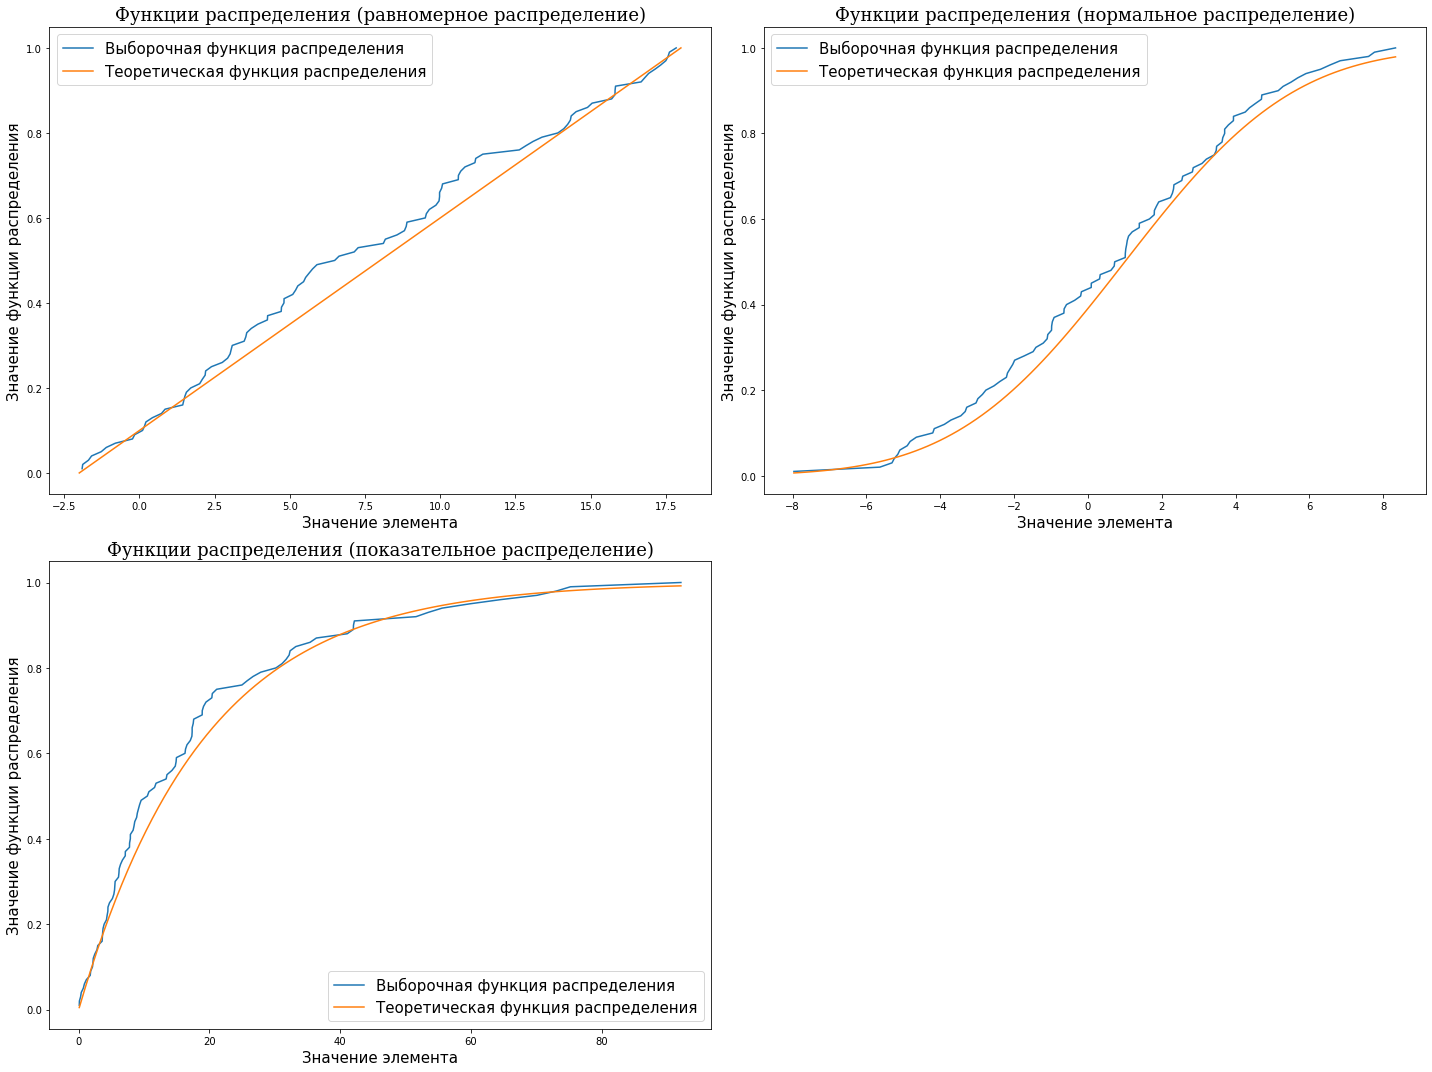

In [154]:
fig, ax = plt.subplots(2,2, figsize = (20,15))

# Равномерное распределение:

x_sorted = np.sort(uniform_sample)
y_sample = np.arange(1, len(x_sorted) + 1) / len(x_sorted)

x_theoretical = np.linspace(-2, 18, 100)
y_theoretical = sts.uniform.cdf(x_theoretical, loc=-2, scale=20)

sns.lineplot(x_sorted, y_sample, label='Выборочная функция распределения', ax = ax[0,0])
sns.lineplot(x_theoretical, y_theoretical, label='Теоретическая функция распределения', ax = ax[0,0])

ax[0,0].set_title('Функции распределения (равномерное распределение)', fontsize = 18, fontfamily = 'serif')
ax[0,0].set_xlabel('Значение элемента', fontsize = 15)
ax[0,0].set_ylabel('Значение функции распределения', fontsize = 15)
ax[0,0].legend(fontsize = 15)

# Нормальное распределение:

x_sorted = np.sort(normal_sample)
y_sample = np.arange(1, len(x_sorted) + 1) / len(x_sorted)

x_theoretical = np.linspace(min(normal_sample), max(normal_sample), 100)
y_theoretical = sts.norm.cdf(x_theoretical, loc = 1, scale = np.sqrt(13))

sns.lineplot(x_sorted, y_sample, label='Выборочная функция распределения', ax = ax[0,1])
sns.lineplot(x_theoretical, y_theoretical, label='Теоретическая функция распределения', ax = ax[0,1])

ax[0,1].set_title('Функции распределения (нормальное распределение)', fontsize = 18, fontfamily = 'serif')
ax[0,1].set_xlabel('Значение элемента', fontsize = 15)
ax[0,1].set_ylabel('Значение функции распределения', fontsize = 15)
ax[0,1].legend(fontsize = 15)

# Показательное распределение

x_sorted = np.sort(exp_sample)
y_sample = np.arange(1, len(x_sorted) + 1) / len(x_sorted)

x_theoretical = np.linspace(min(exp_sample), max(exp_sample), 100)
y_theoretical = sts.expon.cdf(x_theoretical, scale = 1/(1/19))

sns.lineplot(x_sorted, y_sample, label='Выборочная функция распределения', ax = ax[1,0])
sns.lineplot(x_theoretical, y_theoretical, label='Теоретическая функция распределения', ax = ax[1,0])

ax[1,0].set_title('Функции распределения (показательное распределение)', fontsize = 18, fontfamily = 'serif')
ax[1,0].set_xlabel('Значение элемента', fontsize = 15)
ax[1,0].set_ylabel('Значение функции распределения', fontsize = 15)
ax[1,0].legend(fontsize = 15)


ax[1,1].remove()
plt.tight_layout()
plt.show()

    Если сравнивать выборочную и теоретическую функции распределения, то можно заметить, что существуют отклонения выборочной от теоретической, но в целом они схожи. Безусловно, это связано с относительно небольшим количеством наблюдений (100 шт.). При n, стремящейся к + бесконечности различия не будет.

## 1.2 Центральная предельная теорема

Создадим 100 выборок размером 20 наблюдений из равномерного на [-18,32] распределения и вычислим соответстующие выборочные средние по каждой из них

In [193]:
np.random.seed(100)
uniform_samples = np.random.uniform(-18, 32, size = (100, 20))
uniform_samples

array([[  9.17024709,  -4.08153075,   3.22587954, ...,  -9.40294936,
         22.81123744,  -4.29631265],
       [  3.58520918,  29.00149098,  22.88246894, ..., -15.00290056,
         26.52729724,  10.84507497],
       [ 19.12398445,  13.50919682,  11.09210962, ...,  -6.11528957,
        -15.75688588,   7.27157148],
       ...,
       [ -1.0060694 ,  25.57836228, -11.01465607, ...,  -2.13717628,
         31.41651376,  21.59270113],
       [-13.2468095 ,  23.01110012,  -9.88724999, ...,  26.02141371,
         10.14797351,  31.59985656],
       [ 15.92624927,  20.26744202,  -4.84275851, ...,  31.04489092,
          0.23990458,  20.92823484]])

In [194]:
sample_means = np.mean(uniform_samples, axis = 1)
sample_means

array([ 4.73057727,  5.16926782,  5.41759725,  7.06290492,  5.71135068,
       10.48984373,  5.87442941,  5.04147062,  7.3727713 , 11.02522383,
        9.64792686,  4.08499059, 11.58285349,  8.55499289,  6.30694365,
        2.66468775,  5.81919575,  6.47126788,  7.57456182,  1.94315726,
       12.68839588,  5.57355127,  7.79799428,  3.7614212 ,  6.51210496,
        3.73574983,  2.66306816,  5.38648245,  2.3350349 ,  9.70952241,
       11.45893797,  9.52605515, 10.81562333, 13.34742114,  7.82125125,
       11.87055671,  7.52433012,  3.62884965,  8.93756473,  7.28375475,
        8.72087627,  4.34318204,  2.42999697,  5.93967519,  8.55251391,
        2.58094853,  6.97556785,  7.15591392,  7.53568597,  6.29455913,
        0.65540136,  1.28564328, 12.58919571,  9.92543503,  6.79952557,
        8.05791853, 13.84905521,  4.61982211,  2.74763626,  2.53996932,
        3.59923937,  7.45425133,  4.86120453,  5.56774698,  5.9424722 ,
        8.76513918,  4.07645298,  4.5312287 ,  1.71298466,  6.39

Теперь построим гистограмму стандартизированного выборочного среднего

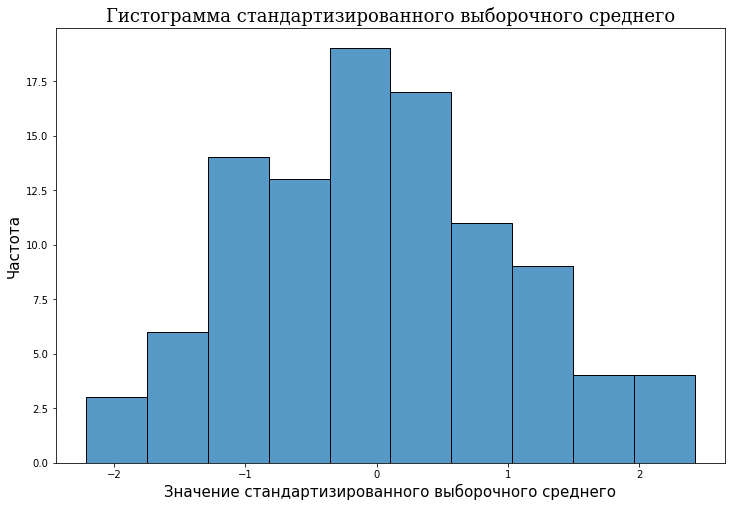

In [195]:
standartized_means = (sample_means - np.mean(sample_means))/np.std(sample_means)


plt.figure(figsize = (12,8))
sns.histplot(standartized_means, bins = 10)
plt.xlabel('Значение стандартизированного выборочного среднего', fontsize = 15)
plt.ylabel('Частота', fontsize = 15)
plt.title('Гистограмма стандартизированного выборочного среднего', fontsize = 18, fontfamily = 'serif')

plt.show()

    Видно, что распределение стандартизированных средних отдаленно напоминает стандартное нормальное: видны хвосты и пик. Безусловно, при большем количестве наблюдений в выборке, распредление, соотвественно, больше бы напоминало стандартное нормальное

## 1.3 Корреляционные связи статистических рядов

Возьмем из представленной базы данных 3 ряда, содержащие данные по ценам определенного товара - чай из Коломбо, чай сорта "Кольката" и пальмовое масло. Далее сохраним выбранные ряды в формат csv таблицы, откроем в блокноте, а также приведем все значения в числовой формат.

In [220]:
df = pd.read_csv('products.csv')

df['Tea, Colombo ($/kg)'] = df['Tea, Colombo ($/kg)'].str.replace(',', '.')
df['Tea, Kolkata ($/kg)'] = df['Tea, Kolkata ($/kg)'].str.replace(',', '.')
df['Palm oil ($/mt)'] = df['Palm oil ($/mt)'].str.replace(',', '.')


df['Tea, Colombo ($/kg)'] = df['Tea, Colombo ($/kg)'].astype(float)
df['Tea, Kolkata ($/kg)'] = df['Tea, Kolkata ($/kg)'].astype(float)
df['Palm oil ($/mt)'] = df['Palm oil ($/mt)'].astype(float)

df

,"Tea, Colombo ($/kg)","Tea, Kolkata ($/kg)",Palm oil ($/mt)
0,0.93,1.12,233.00
1,0.93,1.12,229.00
2,0.93,1.12,225.00
3,0.93,1.12,225.00
4,0.93,1.12,225.00
...,...,...,...
729,3.47,3.50,819.27
730,3.41,2.95,917.81
731,3.39,2.60,1016.37
732,3.35,2.62,990.27


Теперь расчитаем корреляции по каждой паре из выбранных рядов.

In [102]:
corr_matrix = df.corr()
corr_matrix

,"Tea, Colombo ($/kg)","Tea, Kolkata ($/kg)",Palm oil ($/mt)
"Tea, Colombo ($/kg)",1.000000,0.702908,0.750965
"Tea, Kolkata ($/kg)",0.702908,1.000000,0.632118
Palm oil ($/mt),0.750965,0.632118,1.000000


    Можно заметить, что показатель линейной связи для каждой пары представленных продуктов достаточно высок. Причем коэффициент корреляции между чаем Коломбо и пальмовым маслом (0.75) выше, чем между тем же колумбийским чаем и чаем "Кольката" (0.7), что довольно странно. Однако, ввиду множества факторов, которые влияют на ценообразование продуктов, объяснение точно должно быть. Также относительно высокую корреляцию между парами можно объяснить инфляцией и в целом одним сектором экономики (еда).

# Задание 2. Доверительные интервалы

## 2.1 Генерация выборок

Сгенерируем 3 выборки из нормального распредления объемом 100, 300, 1000 с параметрами $ \mu $ = 2, $ \sigma^2 $ = 32 

In [158]:
np.random.seed(100)
sample_norm_100 = np.random.normal(2, np.sqrt(32), 100)
sample_norm_300 = np.random.normal(2, np.sqrt(32), 300)
sample_norm_1000 = np.random.normal(2, np.sqrt(32), 1000)

Сгенерируем 3 выборки из показательного распредления объемом 100, 300, 1000 с параметром $ \lambda = $$\frac{1}{13}$$ $

In [159]:
np.random.seed(100)
sample_exp_100 = np.random.exponential(scale = 1/(1/13), size = 100)
sample_exp_300 = np.random.exponential(scale = 1/(1/13), size = 300)
sample_exp_1000 = np.random.exponential(scale = 1/(1/13), size = 1000)

Сгенерируем 3 выборки объемом 100, 300, 1000 из равномерного на [18, 24] распределения

In [160]:
np.random.seed(100)
sample_uni_100 = np.random.uniform(18, 24, 100)
sample_uni_300 = np.random.uniform(18, 24, 300)
sample_uni_1000 = np.random.uniform(18, 24, 1000)

## 2.2 Доверительные интервалы для одного параметра

1. Для каждой выборки из пункта 2.1 построим 90% и 95% доверительные интервалы для математического ожидания, предполагая дисперсию известной

In [170]:
var_uni = ((24 - 18)**2)/12
var_list = [32, 169, var_uni]
all_samples = [[sample_norm_100, sample_norm_300, sample_norm_1000],
           [sample_exp_100, sample_exp_300, sample_exp_1000],
           [sample_uni_100, sample_uni_300, sample_uni_1000]
          ]

n = [100, 300, 1000]
conf_levels = [0.9, 0.95]

columns = ['90% нижняя', '90% верхняя', '95% нижняя', '95% верхняя']
index = ['Нормальное, 100', 'Нормальное, 300', 'Нормальное, 1000',
         'Показательное, 100', 'Показательное, 300', 'Показательное, 1000',
         'Равномерное, 100', 'Равномерное, 300', 'Равномерное, 1000']

df = pd.DataFrame(columns=columns, index=index)

print('Доверительные интервалы для мат.ожидания (дисперсия известна)\n')


for i, samples in enumerate(all_samples):
    for j, sample in enumerate(samples):
        for k, level in enumerate(conf_levels):
            
            alpha = 1 - level
            mean = np.mean(sample)
            
            lower_bound = round(mean - sts.norm.ppf(1 - alpha/2) * np.sqrt(var_list[i]/n[j]), 2)
            upper_bound = round(mean + sts.norm.ppf(1 - alpha/2) * np.sqrt(var_list[i]/n[j]), 2)

            
            df.iloc[i * 3 + j, k * 2] = lower_bound
            df.iloc[i * 3 + j, k * 2 + 1] = upper_bound
            
            
            
            
df     




    



Доверительные интервалы для мат.ожидания (дисперсия известна)



,90% нижняя,90% верхняя,95% нижняя,95% верхняя
"Нормальное, 100",0.48,2.34,0.3,2.52
"Нормальное, 300",1.7,2.77,1.59,2.87
"Нормальное, 1000",1.69,2.28,1.64,2.34
"Показательное, 100",10.11,14.39,9.7,14.8
"Показательное, 300",12.04,14.51,11.81,14.75
"Показательное, 1000",12.15,13.51,12.02,13.63
"Равномерное, 100",20.55,21.12,20.49,21.17
"Равномерное, 300",20.83,21.16,20.8,21.19
"Равномерное, 1000",20.86,21.04,20.84,21.06


2. Для каждой выборки из пункта 2.1 построим 90% и 95% доверительные интервалы для математического ожидания, предполагая дисперсию неизвестной

In [171]:
mean_list = [2, 13, 21]
all_samples = [[sample_norm_100, sample_norm_300, sample_norm_1000],
           [sample_exp_100, sample_exp_300, sample_exp_1000],
           [sample_uni_100, sample_uni_300, sample_uni_1000]
          ]

n = [100, 300, 1000]
conf_levels = [0.9, 0.95]

columns = ['90% нижняя', '90% верхняя', '95% нижняя', '95% верхняя']
index = ['Нормальное, 100', 'Нормальное, 300', 'Нормальное, 1000',
         'Показательное, 100', 'Показательное, 300', 'Показательное, 1000',
         'Равномерное, 100', 'Равномерное, 300', 'Равномерное, 1000']

df = pd.DataFrame(columns=columns, index=index)

print('Доверительные интервалы для мат.ожидания (дисперсия неизвестна)\n')


for i, samples in enumerate(all_samples):
    for j, sample in enumerate(samples):
        for k, level in enumerate(conf_levels):
            
            
            
            mean = np.mean(sample)
            sample_std = np.std(sample)
            t_value = t_value = sts.t.ppf((1 + level)/2, df = n[j]-1)
            
            lower_bound = round(mean - t_value * std/np.sqrt(n[z]), 2)
            upper_bound = round(mean + t_value * std/np.sqrt(n[z]), 2)

            
            df.iloc[i * 3 + j, k * 2] = lower_bound
            df.iloc[i * 3 + j, k * 2 + 1] = upper_bound
            
            
            
            
df     





Доверительные интервалы для мат.ожидания (дисперсия неизвестна)



,90% нижняя,90% верхняя,95% нижняя,95% верхняя
"Нормальное, 100",1.32,1.5,1.3,1.52
"Нормальное, 300",2.14,2.32,2.13,2.34
"Нормальное, 1000",1.9,2.08,1.88,2.1
"Показательное, 100",12.16,12.34,12.14,12.36
"Показательное, 300",13.19,13.37,13.17,13.39
"Показательное, 1000",12.74,12.92,12.72,12.94
"Равномерное, 100",20.74,20.92,20.73,20.94
"Равномерное, 300",20.91,21.09,20.89,21.1
"Равномерное, 1000",20.86,21.04,20.84,21.06


3. Для каждой выборки из пункта 2.1 построим 90% и 95% доверительные интервалы для дипсерсии и стандартного отклонения, предполагая мат.ожидание известным 

In [173]:
mean_list = [2, 13, 21]
all_samples = [[sample_norm_100, sample_norm_300, sample_norm_1000],
           [sample_exp_100, sample_exp_300, sample_exp_1000],
           [sample_uni_100, sample_uni_300, sample_uni_1000]
          ]

n = [100, 300, 1000]
conf_levels = [0.9, 0.95]

columns = ['90% нижняя', '90% верхняя', '95% нижняя', '95% верхняя']
index = ['Нормальное, 100', 'Нормальное, 300', 'Нормальное, 1000',
         'Показательное, 100', 'Показательное, 300', 'Показательное, 1000',
         'Равномерное, 100', 'Равномерное, 300', 'Равномерное, 1000']

df = pd.DataFrame(columns=columns, index=index)

print('Дов.интервалы для дисперсии при известном мат. ожидании\n ')

for i, samples in enumerate(all_samples):
    for j, sample in enumerate(samples):
        for k, level in enumerate(conf_levels):
            
            alpha = 1 - level
            
            sample_var = np.var(sample, ddof= 0)
            
            lower_bound = n[j] * sample_var / sts.chi2.ppf(1-alpha/2, n[j])
            upper_bound = n[j] * sample_var / sts.chi2.ppf(alpha / 2, n[j])

            
            df.iloc[i * 3 + j, k * 2] = lower_bound
            df.iloc[i * 3 + j, k * 2 + 1] = upper_bound
            
            
            
            
df            

Дов.интервалы для дисперсии при известном мат. ожидании
 


,90% нижняя,90% верхняя,95% нижняя,95% верхняя
"Нормальное, 100",24.202128,38.61625,23.227199,40.545211
"Нормальное, 300",32.560533,42.609961,31.771414,43.778918
"Нормальное, 1000",31.619965,36.633822,31.188952,37.168238
"Показательное, 100",134.491063,214.590245,129.07339,225.309468
"Показательное, 300",166.204798,217.50197,162.176754,223.468894
"Показательное, 1000",162.610863,188.395445,160.394304,191.143763
"Равномерное, 100",2.421953,3.864402,2.32439,4.057437
"Равномерное, 300",2.662679,3.484484,2.598148,3.580077
"Равномерное, 1000",2.809492,3.254983,2.771196,3.302467


In [172]:
mean_list = [2, 13, 21]
all_samples = [[sample_norm_100, sample_norm_300, sample_norm_1000],
           [sample_exp_100, sample_exp_300, sample_exp_1000],
           [sample_uni_100, sample_uni_300, sample_uni_1000]
          ]

n = [100, 300, 1000]
conf_levels = [0.9, 0.95]

columns = ['90% нижняя', '90% верхняя', '95% нижняя', '95% верхняя']
index = ['Нормальное, 100', 'Нормальное, 300', 'Нормальное, 1000',
         'Показательное, 100', 'Показательное, 300', 'Показательное, 1000',
         'Равномерное, 100', 'Равномерное, 300', 'Равномерное, 1000']

df = pd.DataFrame(columns=columns, index=index)

print('Дов.интервалы для стандартного отклонения при известном мат. ожидании\n ')

for i, samples in enumerate(all_samples):
    for j, sample in enumerate(samples):
        for k, level in enumerate(conf_levels):
            
            alpha = 1 - level
            
            sample_var = np.var(sample, ddof = 0)
            
            lower_bound = round(np.sqrt((n[j] * sample_var) / sts.chi2.ppf(1-alpha/2, n[j])), 2)
            upper_bound = round(np.sqrt((n[j] * sample_var) / sts.chi2.ppf(alpha/2, n[j])), 2)
            
            df.iloc[i * 3 + j, k * 2] = lower_bound
            df.iloc[i * 3 + j, k * 2 + 1] = upper_bound
            
            
            
            
df           


Дов.интервалы для стандартного отклонения при известном мат. ожидании
 


,90% нижняя,90% верхняя,95% нижняя,95% верхняя
"Нормальное, 100",4.92,6.21,4.82,6.37
"Нормальное, 300",5.71,6.53,5.64,6.62
"Нормальное, 1000",5.62,6.05,5.58,6.1
"Показательное, 100",11.6,14.65,11.36,15.01
"Показательное, 300",12.89,14.75,12.73,14.95
"Показательное, 1000",12.75,13.73,12.66,13.83
"Равномерное, 100",1.56,1.97,1.52,2.01
"Равномерное, 300",1.63,1.87,1.61,1.89
"Равномерное, 1000",1.68,1.8,1.66,1.82


4. Для каждой выборки из пункта 2.1 построим 90% и 95% доверительные интервалы для дипсерсии и стандартного отклонения, предполагая мат.ожидание неизвестным 

In [174]:
all_samples = [[sample_norm_100, sample_norm_300, sample_norm_1000],
           [sample_exp_100, sample_exp_300, sample_exp_1000],
           [sample_uni_100, sample_uni_300, sample_uni_1000]
          ]

n = [100, 300, 1000]
conf_levels = [0.9, 0.95]

columns = ['90% нижняя', '90% верхняя', '95% нижняя', '95% верхняя']
index = ['Нормальное, 100', 'Нормальное, 300', 'Нормальное, 1000',
         'Показательное, 100', 'Показательное, 300', 'Показательное, 1000',
         'Равномерное, 100', 'Равномерное, 300', 'Равномерное, 1000']

df = pd.DataFrame(columns=columns, index=index)

print('Дов.интервалы для дисперсии при неизвестном мат. ожидании\n ')

for i, samples in enumerate(all_samples):
    for j, sample in enumerate(samples):
        for k, level in enumerate(conf_levels):
            
            alpha = 1 - level
            dof = n[j] - 1
            
            sample_var = np.var(sample, ddof= 1)
            
            lower_bound = (n[j] - 1) * sample_var / sts.chi2.ppf(1-alpha/2, dof)
            upper_bound = (n[j] - 1) * sample_var / sts.chi2.ppf(alpha / 2, dof)

            
            df.iloc[i * 3 + j, k * 2] = lower_bound
            df.iloc[i * 3 + j, k * 2 + 1] = upper_bound
            
            
            
            
df           

Дов.интервалы для дисперсии при неизвестном мат. ожидании
 


,90% нижняя,90% верхняя,95% нижняя,95% верхняя
"Нормальное, 100",24.421491,39.058883,23.433243,41.020984
"Нормальное, 300",32.662642,42.762855,31.869803,43.938097
"Нормальное, 1000",31.6505,36.671902,31.218862,37.20715
"Показательное, 100",135.710066,217.049957,130.218378,227.953336
"Показательное, 300",166.726014,218.282414,162.678977,224.281421
"Показательное, 1000",162.767893,188.591276,160.54812,191.343876
"Равномерное, 100",2.443905,3.908697,2.34501,4.105048
"Равномерное, 300",2.67103,3.496987,2.606194,3.593094
"Равномерное, 1000",2.812205,3.258366,2.773854,3.305924


In [175]:
mean_list = [2, 13, 21]
all_samples = [[sample_norm_100, sample_norm_300, sample_norm_1000],
           [sample_exp_100, sample_exp_300, sample_exp_1000],
           [sample_uni_100, sample_uni_300, sample_uni_1000]
          ]

n = [100, 300, 1000]
conf_levels = [0.9, 0.95]

columns = ['90% нижняя', '90% верхняя', '95% нижняя', '95% верхняя']
index = ['Нормальное, 100', 'Нормальное, 300', 'Нормальное, 1000',
         'Показательное, 100', 'Показательное, 300', 'Показательное, 1000',
         'Равномерное, 100', 'Равномерное, 300', 'Равномерное, 1000']

df = pd.DataFrame(columns=columns, index=index)

print('Дов.интервалы для стандартного отклонения при неизвестном мат. ожидании\n ')

for i, samples in enumerate(all_samples):
    for j, sample in enumerate(samples):
        for k, level in enumerate(conf_levels):
            
            alpha = 1 - level
            
            sample_var = np.var(sample, ddof = 1)
            
            lower_bound = round(np.sqrt(((n[j]-1) * sample_var) / sts.chi2.ppf(1-alpha/2, n[j] - 1)), 2)
            upper_bound = round(np.sqrt(((n[j]-1) * sample_var) / sts.chi2.ppf(alpha/2, n[j] - 1)), 2)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
            
            df.iloc[i * 3 + j, k * 2] = lower_bound
            df.iloc[i * 3 + j, k * 2 + 1] = upper_bound
            
            
            
            
df           

Дов.интервалы для стандартного отклонения при известном мат. ожидании
 


,90% нижняя,90% верхняя,95% нижняя,95% верхняя
"Нормальное, 100",4.94,6.25,4.84,6.4
"Нормальное, 300",5.72,6.54,5.65,6.63
"Нормальное, 1000",5.63,6.06,5.59,6.1
"Показательное, 100",11.65,14.73,11.41,15.1
"Показательное, 300",12.91,14.77,12.75,14.98
"Показательное, 1000",12.76,13.73,12.67,13.83
"Равномерное, 100",1.56,1.98,1.53,2.03
"Равномерное, 300",1.63,1.87,1.61,1.9
"Равномерное, 1000",1.68,1.81,1.67,1.82


Таким образом, построив такое большое количество доверительных интервалов :), можно сделать несколько выводов:

- Доверительные интервалы для каждого параметра для разных распределений различаются. Оно и неудевительно, несмотря на то, что мы использовали предпосылку о нормальности выборок, все же истинные и выборочные параметры различаются.

- Доверительные интервалы для параметров в основном увеличиваются с увелиением размера выборок. Это объясняется тем, что увеличение размера выборки, обеспечивает более точное оценки параметров.

- Уровень доверия, как и предполагалось, влияет на ширину довенительных интервалов. Более высокий уровень доверия (95%) треубет более широкого интервала для охвата оценки параметров.

- От вида распределения также может зависеть ширина доверительных интервалов. Например, для равномерного распределения интервалы в среднем более узкие. Конечно, это завсит от заданных параметров, но все же.

## 2.3 Доверительные интервалы для разности параметров

1. Построим 90% и 95% доверительные интервалы для разностей математических ожиданий, предполагая дисперсии известными, но равными для каждой пары выборок из каждого распределения из пункта 2.1, предполагая их нормальность

In [181]:

var_list = [3, 169, 32]
all_samples = [[sample_norm_100, sample_norm_300, sample_norm_1000],
               [sample_exp_100, sample_exp_300, sample_exp_1000],
               [sample_uni_100, sample_uni_300, sample_uni_1000]
              ]

n = [100, 300, 1000]
conf_levels = [0.9, 0.95]

columns = ['90% нижняя', '90% верхняя', '95% нижняя', '95% верхняя']
index = ['Нормальное 100-300', 'Нормальное 100-1000', 'Нормальное 300-1000',
         'Показательное 100-300', 'Показательное 100-1000', 'Показательное 300-1000',
         'Равномерное 100-300', 'Равномерное 100-1000', 'Равномерное 300-1000']


df = pd.DataFrame(columns=columns, index=index)

print('Дов. интервалы для разностей математических ожиданий (дисперсии известны)\n')

for i in range(len(all_samples)):
    for k, level in enumerate(conf_levels):
        alpha = 1 - level

        sample1_mean = np.mean(all_samples[i][0])  
        sample1_var = var_list[i]  

        sample2_mean = np.mean(all_samples[i][1])  
        sample2_var = var_list[i]  
        
        sample3_mean = np.mean(all_samples[i][2])  
        sample3_var = var_list[i]  

        sample_diff_100_300 = sample1_mean - sample2_mean
        sample_diff_100_1000 = sample1_mean - sample3_mean
        sample_diff_300_1000 = sample2_mean - sample3_mean

        z = sts.norm.ppf(1 - alpha / 2)
        
        lower_bound_100_300 = sample_diff_100_300 - z * np.sqrt(sample1_var / n[0] + sample2_var / n[1])
        upper_bound_100_300 = sample_diff_100_300 + z * np.sqrt(sample1_var / n[0] + sample2_var / n[1])
        lower_bound_100_1000 = sample_diff_100_1000 - z * np.sqrt(sample1_var / n[0] + sample3_var / n[2])
        upper_bound_100_1000 = sample_diff_100_1000 + z * np.sqrt(sample1_var / n[0] + sample3_var / n[2])
        lower_bound_300_1000 = sample_diff_300_1000 - z * np.sqrt(sample2_var / n[1] + sample3_var / n[2])
        upper_bound_300_1000 = sample_diff_300_1000 + z * np.sqrt(sample2_var / n[1] + sample3_var / n[2])

        df.iloc[i * 3, k * 2] = lower_bound_100_300
        df.iloc[i * 3, k * 2 + 1] = upper_bound_100_300
        df.iloc[i * 3 + 1, k * 2] = lower_bound_100_1000
        df.iloc[i * 3 + 1, k * 2 + 1] = upper_bound_100_1000
        df.iloc[i * 3 + 2, k * 2] = lower_bound_300_1000
        df.iloc[i * 3 + 2, k * 2 + 1] = upper_bound_300_1000


df

Дов. интервалы для разностей математических ожиданий (дисперсии известны)



,90% нижняя,90% верхняя,95% нижняя,95% верхняя
Нормальное 100-300,-1.150954,-0.493013,-1.213976,-0.429991
Нормальное 100-1000,-0.876887,-0.279282,-0.93413,-0.222039
Нормальное 300-1000,0.056357,0.431441,0.020429,0.467369
Показательное 100-300,-3.494979,1.443236,-3.967995,1.916251
Показательное 100-1000,-2.818899,1.666458,-3.248536,2.096095
Показательное 300-1000,-0.957957,1.857259,-1.227617,2.126919
Равномерное 100-300,-1.235848,0.91298,-1.441677,1.118809
Равномерное 100-1000,-1.090992,0.860778,-1.277945,1.047732
Равномерное 300-1000,-0.566183,0.658837,-0.683524,0.776178


2. Построим 90% и 95% доверительные интервалы для разностей математических ожиданий, предполагая дисперсии неизвестными, но равными для каждой пары выборок из каждого распределения из пункта 2.1, предполагая их нормальность

In [185]:
all_samples = [[sample_norm_100, sample_norm_300, sample_norm_1000],
               [sample_exp_100, sample_exp_300, sample_exp_1000],
               [sample_uni_100, sample_uni_300, sample_uni_1000]
              ]

n = [100, 300, 1000]
conf_levels = [0.9, 0.95]

columns = ['90% нижняя', '90% верхняя', '95% нижняя', '95% верхняя']
index = ['Нормальное 100-300', 'Нормальное 100-1000', 'Нормальное 300-1000',
         'Показательное 100-300', 'Показательное 100-1000', 'Показательное 300-1000',
         'Равномерное 100-300', 'Равномерное 100-1000', 'Равномерное 300-1000']


df = pd.DataFrame(columns=columns, index=index)

print('Дов. интервалы для разностей математических ожиданий (дисперсии неизвестны, но равны)\n')

for i in range(len(all_samples)):
    for k, level in enumerate(conf_levels):
        
        alpha = 1 - level

        sample1_mean = np.mean(all_samples[i][0])  
        sample1_var = np.var(all_samples[i][0])  

        sample2_mean = np.mean(all_samples[i][1])  
        sample2_var = np.var(all_samples[i][1]) 
        
        sample3_mean = np.mean(all_samples[i][2])  
        sample3_var = np.var(all_samples[i][2]) 
        
        var0_sample1_2 = (sample1_var*99 + sample2_var*99)/(100 + 100 - 2)
        var0_sample1_3 = (sample1_var*99 + sample3_var*99)/(100 + 100 - 2)
        var0_sample2_3 = (sample2_var*99 + sample3_var*99)/(100 + 100 - 2)

        sample_diff_100_300 = sample1_mean - sample2_mean
        sample_diff_100_1000 = sample1_mean - sample3_mean
        sample_diff_300_1000 = sample2_mean - sample3_mean
        
        dof = 100 + 100 - 2

        t = abs(sts.t.ppf(alpha / 2, dof))
        
        lower_bound_100_300 = sample_diff_100_300 - t * np.sqrt(var0_sample1_2 * (1 / n[0] + 1 / n[1]))
        upper_bound_100_300 = sample_diff_100_300 + t * np.sqrt(var0_sample1_2 * (1 / n[0] + 1 / n[1]))
        lower_bound_100_1000 = sample_diff_100_1000 - t * np.sqrt(var0_sample1_3 * (1 / n[0] + 1 / n[2]))
        upper_bound_100_1000 = sample_diff_100_1000 + t * np.sqrt(var0_sample1_3 * (1 / n[0] + 1 / n[2]))
        lower_bound_300_1000 = sample_diff_300_1000 - t * np.sqrt(var0_sample2_3 * (1 / n[1] + 1 / n[2]))
        upper_bound_300_1000 = sample_diff_300_1000 + t * np.sqrt(var0_sample2_3 * (1 / n[1] + 1 / n[2]))
        
        df.iloc[i * 3, k * 2] = lower_bound_100_300
        df.iloc[i * 3, k * 2 + 1] = upper_bound_100_300
        df.iloc[i * 3 + 1, k * 2] = lower_bound_100_1000
        df.iloc[i * 3 + 1, k * 2 + 1] = upper_bound_100_1000
        df.iloc[i * 3 + 2, k * 2] = lower_bound_300_1000
        df.iloc[i * 3 + 2, k * 2 + 1] = upper_bound_300_1000
        

df

Дов. интервалы для разностей математических ожиданий (дисперсии неизвестны, но равны)



,90% нижняя,90% верхняя,95% нижняя,95% верхняя
Нормальное 100-300,-1.927667,0.283701,-2.141387,0.49742
Нормальное 100-1000,-1.559129,0.40296,-1.748757,0.592589
Нормальное 300-1000,-0.40443,0.892228,-0.529747,1.017545
Показательное 100-300,-3.573097,1.521354,-4.065455,2.013712
Показательное 100-1000,-2.84268,1.690239,-3.280769,2.128328
Показательное 300-1000,-1.017743,1.917046,-1.301379,2.200681
Равномерное 100-300,-0.493095,0.170227,-0.557202,0.234334
Равномерное 100-1000,-0.416084,0.18587,-0.47426,0.244047
Равномерное 300-1000,-0.142871,0.235525,-0.179441,0.272095


3. Преобразуйте 3 выборки из равномерного распределения (пункт 2.1.3) в 3 выборки из биномиального распределения с помощью следующего правила: если элемент выборки меньше 19.68 , то ставим 0, если больше или равен 19.68, то ставим 1. Для всех трех пар выборок построим 90% и 95% доверительные интервалы для всех возможных разностей долей.


In [192]:
sample_bin_100 = np.where(sample_uni_100 < 19.68, 0, 1)
sample_bin_300 = np.where(sample_uni_300 < 19.68, 0, 1)
sample_bin_1000 = np.where(sample_uni_1000 < 19.68, 0, 1)

p1 = np.mean(sample_bin_100)
p2 = np.mean(sample_bin_300)
p3 = np.mean(sample_bin_1000)

diff_1_2 = p1 - p2
diff_1_3 = p1 - p3
diff_2_3 = p2 - p3

z_90 = sts.norm.ppf(0.95)
z_95 = sts.norm.ppf(0.975)

lower_bound_100_300_90 = diff_1_2 - z_90 * np.sqrt((p1*(1-p1))/100 + (p2*(1-p2))/100)
upper_bound_100_300_90 = diff_1_2 + z_90 * np.sqrt((p1*(1-p1))/100 + (p2*(1-p2))/100)
lower_bound_100_1000_90 = diff_1_3 - z_90 * np.sqrt((p1*(1-p1))/100 + (p3*(1-p3))/100)
upper_bound_100_1000_90 = diff_1_3 + z_90 * np.sqrt((p1*(1-p1))/100 + (p3*(1-p3))/100)
lower_bound_300_1000_90 = diff_2_3 - z_90 * np.sqrt((p1*(1-p1))/100 + (p3*(1-p3))/100)
upper_bound_300_1000_90 = diff_2_3 + z_90 * np.sqrt((p2*(1-p2))/100 + (p3*(1-p3))/100)

lower_bound_100_300_95 = diff_1_2 - z_95 * np.sqrt((p1*(1-p1))/100 + (p2*(1-p2))/100)
upper_bound_100_300_95 = diff_1_2 + z_95 * np.sqrt((p1*(1-p1))/100 + (p2*(1-p2))/100)
lower_bound_100_1000_95 = diff_1_3 - z_95 * np.sqrt((p1*(1-p1))/100 + (p3*(1-p3))/100)
upper_bound_100_1000_95 = diff_1_3 + z_95 * np.sqrt((p1*(1-p1))/100 + (p3*(1-p3))/100)
lower_bound_300_1000_95 = diff_2_3 - z_95 * np.sqrt((p1*(1-p1))/100 + (p3*(1-p3))/100)
upper_bound_300_1000_95 = diff_2_3 + z_95 * np.sqrt((p2*(1-p2))/100 + (p3*(1-p3))/100)



data = {
    'Interval': ['100 - 300', '100 - 1000', '300 - 1000'],
    '90% нижняя': [lower_bound_100_300_90, lower_bound_100_1000_90, lower_bound_300_1000_90],
    '90% верхняя': [upper_bound_100_300_90, upper_bound_100_1000_90, upper_bound_300_1000_90],
    '95% нижняя': [lower_bound_100_300_95, lower_bound_100_1000_95, lower_bound_300_1000_95],
    '95% верхняя': [upper_bound_100_300_95, upper_bound_100_1000_95, upper_bound_300_1000_95]
}


df = pd.DataFrame(data)

df = df.set_index(['Interval'])

print('Дов. интервалы для разностей долей для выборок из равномерного распределения, преобразованных в биномиальное')
df

Дов. интервалы для разностей долей для выборок из равномерного распределения, преобразованных в биномиальное


,90% нижняя,90% верхняя,95% нижняя,95% верхняя
Interval,,,,
100 - 300,-0.153791,0.060458,-0.174314,0.080980
100 - 1000,-0.145589,0.069589,-0.166200,0.090200
300 - 1000,-0.098922,0.113962,-0.119533,0.134134


Итак, мы построили еще больше доверительных интервалов :). Сделаем некоторые выводы:

- Сравнивая интервалы для разности математических ожиданий при известной и неизвестной дисперсиях, то тут можно заметить: для нормального и равномерного распределений интервалы стали шире в большинстве случаях, тогда как для экспоненциального, наоборот, уже.
- С увеличением уровня значимости интервалы становились уже  -- здесь все так же предсказуемо, как и в пункте 2.2
- Интересный факт можно заметить, взгялнув на доверительные интервалы разностей долей: интервалы для выборок 100-300 и 300-1000 очень полхожи. Тогда как интервал для выборок 300-1000 отличается. Вероятно, это связано с разным набором наблюдений в выборках - а следовательно, разными выборочными долями и самими интервалами.
- Также схожий вид интервалов 100-300 и 100-1000 можно наблюдать и в интервалах разности мат.ожиданий - причем для всех распределений. Объясняется это скорее всего теми же самыми причинами.


# Задание 3. Проверка гипотез.


## 3.1 Использование симулированных данных

1. Создадим 100 выборок объемом n = 100 из нормального распределения с параметрами $ \mu $ = 18, $ \sigma^2 $ = 2 

In [213]:
np.random.seed(100)
norm_samples = np.random.normal(18, np.sqrt(2), size = (100, 100))
norm_samples

array([[15.52545794, 18.48462327, 19.63063887, ..., 18.00559688,
        17.73835054, 14.48263657],
       [15.58925915, 16.39308427, 13.79509693, ..., 19.43862903,
        17.15149584, 20.22903636],
       [18.85478397, 16.71726528, 18.83724734, ..., 16.64494534,
        15.33970215, 18.25787156],
       ...,
       [18.64789807, 18.2696707 , 18.19140082, ..., 16.1938778 ,
        15.63974749, 19.43847727],
       [17.9236715 , 17.36624315, 19.45575506, ..., 17.60494343,
        19.3531992 , 15.8831948 ],
       [16.74193287, 17.99986829, 18.16314887, ..., 17.36501651,
        19.03623245, 17.70275921]])

2. Для каждой выборки проверим на 1%, 5% и 10% уровне значимости гипотезу о том, что математическое ожидание равно истинному значению (т.е 18) при известной дисперсии. Рассчитаем долюверных ответов.

In [217]:
mu = 18
sigma_sq = 2
alpha_list = [0.01, 0.05, 0.1]
num_samples = 100
correct_counts = []


for alpha in alpha_list:
    correct_count = 0

    
    for sample in norm_samples:
        
        z_stat = (np.mean(sample) - mu) / np.sqrt(sigma_sq/100)
        
        p_value = 2 * (1 - sts.norm.cdf(abs(z_stat)))
        
        if p_value > alpha:
            correct_count += 1
    
    correct_counts.append(correct_count)
    
accuracies = [count / 100 for count in correct_counts]

for i, alpha in enumerate(alpha_list):
    print(f'Доля верных ответов на уровне значимости {alpha}: {accuracies[i]}')

Доля верных ответов на уровне значимости 0.01: 1.0
Доля верных ответов на уровне значимости 0.05: 0.98
Доля верных ответов на уровне значимости 0.1: 0.93


3. Теперь Для каждой выборки проверим на 1%, 5% и 10% уровне значимости гипотезу о том, что математическое ожидание равно истинному значению (т.е 18) при неизвестной дисперсии. Рассчитаем долюверных ответов.

In [219]:
mu = 18
alpha_list = [0.01, 0.05, 0.1]
correct_counts = []


for alpha in alpha_list:
    correct_count = 0

    
    for sample in norm_samples:
        
        t_stat = (np.mean(sample) - mu) / (np.std(sample, ddof = 1) / np.sqrt(100))
        
        p_value = 2 * (1 - sts.t.cdf(abs(t_stat), df = 99))
        
        if p_value > alpha:
            correct_count += 1
    
    correct_counts.append(correct_count)
    
accuracies = [count / 100 for count in correct_counts]

for i, alpha in enumerate(alpha_list):
    print(f'Доля верных ответов на уровне значимости {alpha}: {accuracies[i]}')

Доля верных ответов на уровне значимости 0.01: 1.0
Доля верных ответов на уровне значимости 0.05: 0.98
Доля верных ответов на уровне значимости 0.1: 0.94


## 3.2 Использование реальных данных

1. Возьмем уже использованные нами 3 ряда: чай из Коломбо, чай сорта Кольката и пальмовое масло. Они уже сохранены в df таблицу, поэтому просто посмортим на нее еще раз:

In [221]:
df

,"Tea, Colombo ($/kg)","Tea, Kolkata ($/kg)",Palm oil ($/mt)
0,0.93,1.12,233.00
1,0.93,1.12,229.00
2,0.93,1.12,225.00
3,0.93,1.12,225.00
4,0.93,1.12,225.00
...,...,...,...
729,3.47,3.50,819.27
730,3.41,2.95,917.81
731,3.39,2.60,1016.37
732,3.35,2.62,990.27


2. Теперь на уровне значимости 5% проверим для каждого показателя гипотезы о том, что его математическое ожидание равно последнему доступному значению на выборках в 36, 72 и 108 последних наблюдений. Так как истинные дисперсии неизвестны, проверять будем через t статистику.

In [228]:
last_values = df.iloc[:, -1]
sample_sizes = [36, 72, 108]
alpha = 0.05

for column in df:
    
    last_value = df[column].iloc[-1]
    
    if pd.isnull(last_value):
        last_value = df[column].iloc[-2]
    
    for size in sample_sizes:
        sample = row[-size: -1]
        mu = last_value
        
        t_stat = (np.mean(sample) - mu) / (np.std(sample, ddof = 1)/np.sqrt(size))
        p_value = 2 * (1 - sts.t.cdf(abs(t_stat), df = size - 1))
        
        if p_value > alpha:
            print(f'Не отвергаем нулевую гипотезу для ряда {column}, размер выборки {size}\n')
        else:
            print(f'Отвергаем нулевую гипотезу для ряда {column}, размер выборки {size}\n')

Отвергаем нулевую гипотезу для ряда Tea, Colombo ($/kg), размер выборки 36

Отвергаем нулевую гипотезу для ряда Tea, Colombo ($/kg), размер выборки 72

Отвергаем нулевую гипотезу для ряда Tea, Colombo ($/kg), размер выборки 108

Отвергаем нулевую гипотезу для ряда Tea, Kolkata ($/kg), размер выборки 36

Отвергаем нулевую гипотезу для ряда Tea, Kolkata ($/kg), размер выборки 72

Отвергаем нулевую гипотезу для ряда Tea, Kolkata ($/kg), размер выборки 108

Отвергаем нулевую гипотезу для ряда Palm oil ($/mt), размер выборки 36

Отвергаем нулевую гипотезу для ряда Palm oil ($/mt), размер выборки 72

Отвергаем нулевую гипотезу для ряда Palm oil ($/mt), размер выборки 108



Видно, что все нулевые гипотезы отвергнуты. В принципе это логично, учитывая, что мы брали за мю нулевое последнее значение из выборки. Вероятно, выборочная дипсрерсия по рядам достаточно высокая, что также выражается в инфляции: данные по продуктам собирались с конца 90-х. До нашего времени инфляция могла составить десятки: а то и сотни процентов, что приводит к большой дисперсии и крайне маленьким шансам на приянятие (не отвержение) нулевой гипотезы.

In [229]:
sudo apt-get install textlive-latex-extra pandoc

SyntaxError: invalid syntax (2234981749.py, line 1)